In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head(20)


,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [3]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [4]:
print(train.shape)
print(test.shape)

(159571, 8)
(153164, 2)


In [5]:
train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
print(train.isnull().sum())
print(test.isnull().sum())

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64
id              0
comment_text    0
dtype: int64


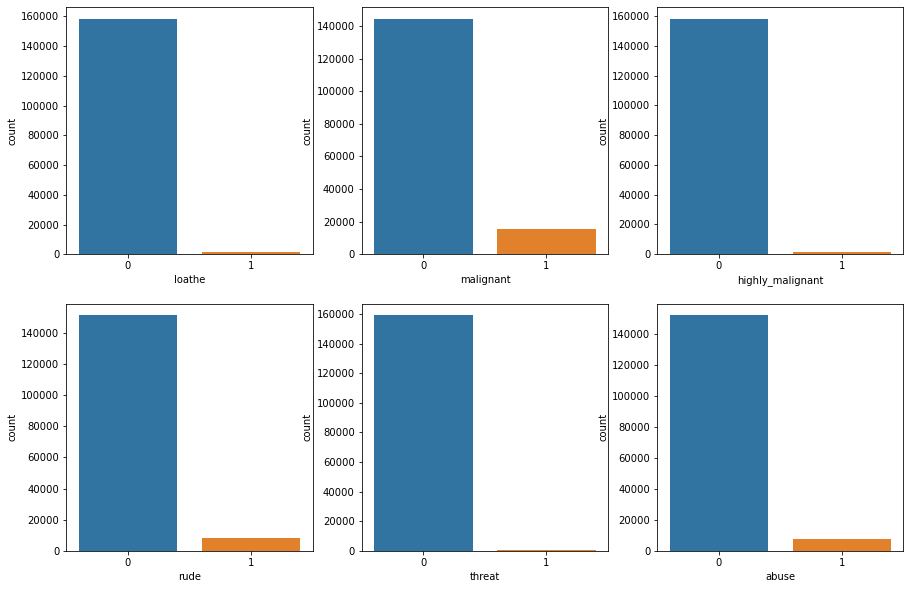

In [8]:
figure,ax=plt.subplots(2,3,figsize=(15,10))
ax1,ax2,ax3,ax4,ax5,ax6=ax.flatten()
sns.countplot(train['loathe'],ax=ax1)
sns.countplot(train['malignant'],ax=ax2)
sns.countplot(train['highly_malignant'],ax=ax3)
sns.countplot(train['rude'],ax=ax4)
sns.countplot(train['threat'],ax=ax5)
sns.countplot(train['abuse'],ax=ax6)

In [9]:
no_rows=train.iloc[:,2:].sum(axis=1)
train['clean']=(no_rows==0)
print('There are {} of cleaned rows in the dataset'.format(train['clean'].sum()))


There are 143346 of cleaned rows in the dataset


In [10]:
x=np.array([len(train['comment_text'][i]) for i in range(train['comment_text'].shape[0])])

In [11]:
x

array([264, 112, 233, ...,  81, 116, 189])

In [12]:
print('Max len of coments is: {0}\n Min length of the comments is: {1}\n Mean of comments is: {2}'.format(x.max(),x.min(),x.mean()))

Max len of coments is: 5000
 Min length of the comments is: 5
 Mean of comments is: 394.138847284281


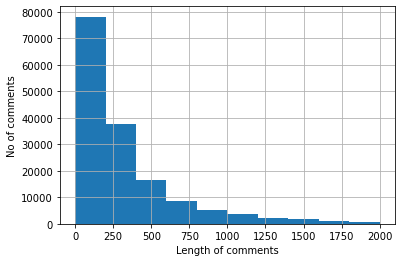

In [13]:
bins=[1,200,400,600,800,1000,1200,1400,1600,1800,2000]
plt.hist(x,bins=bins)
plt.ylabel('No of comments')
plt.xlabel('Length of comments')
plt.grid(True)
plt.show()

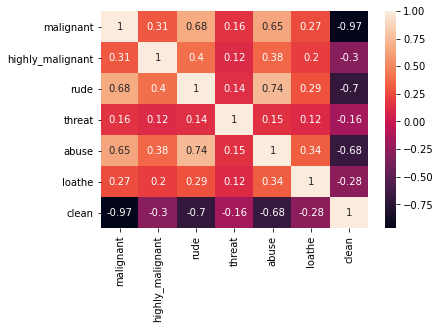

In [14]:
sns.heatmap(train.corr(),annot=True)

In [31]:
from wordcloud import WordCloud,STOPWORDS

def showWordCloud(df, label):
    plt.figure(figsize=(10,8))
    text = df[df[label]==1]["comment_text"].tolist()
    label_img = WordCloud(stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=1200,
                          height=800,
                         ).generate(" ".join(text))
    plt.title(label,fontsize=40)
    plt.imshow(label_img)

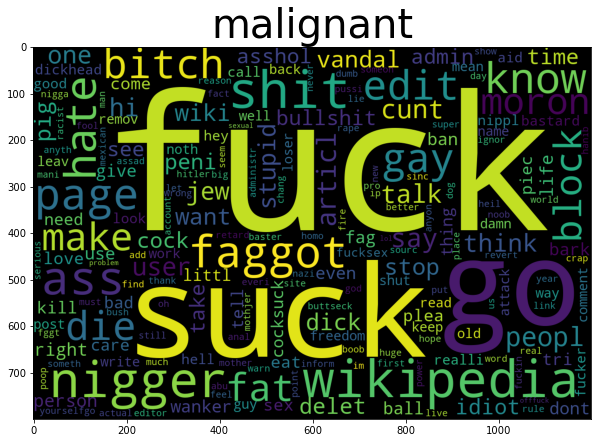

In [32]:
showWordCloud(train, "malignant")

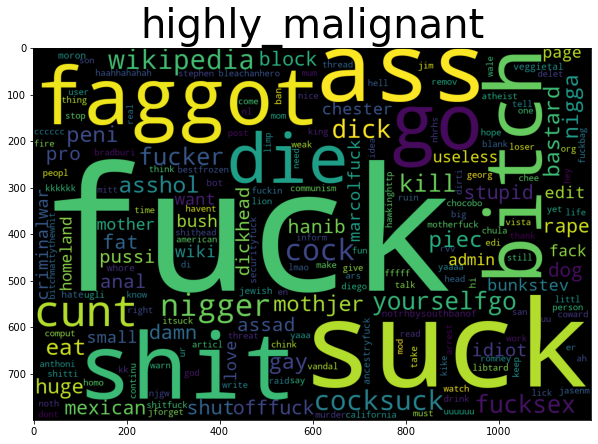

In [33]:
showWordCloud(train, "highly_malignant")

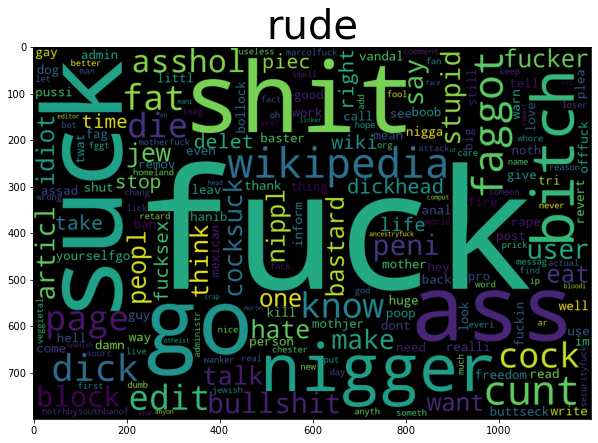

In [34]:
showWordCloud(train, "rude")

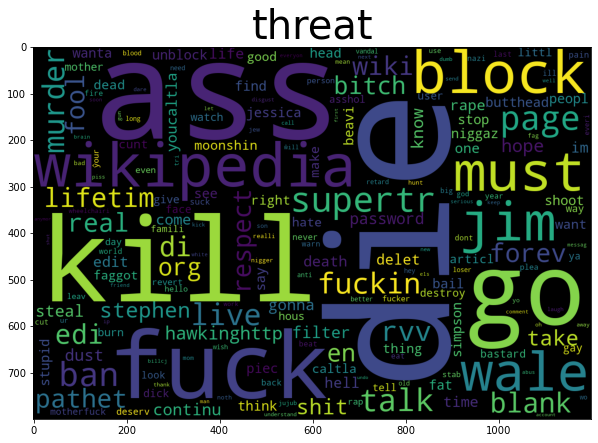

In [36]:
showWordCloud(train, "threat")

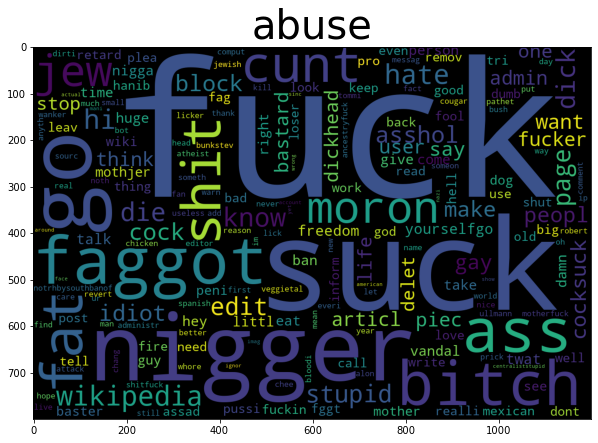

In [37]:
showWordCloud(train, "abuse")

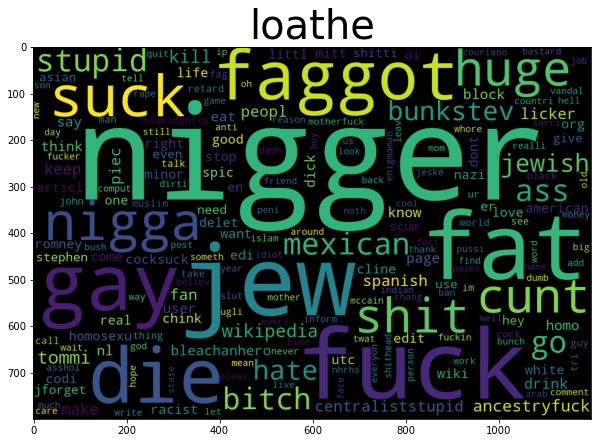

In [38]:
showWordCloud(train, "loathe")

In [15]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [16]:
train['comment_text'] = train['comment_text'].apply(lambda x : clean_text(x))

In [17]:
test['comment_text']=test['comment_text'].apply(lambda x: clean_text(x))

In [18]:
from nltk.stem import WordNetLemmatizer,SnowballStemmer
from nltk.corpus import stopwords
import string
stop_words=stopwords.words('english')
lemmatizer=WordNetLemmatizer()
stemmer=SnowballStemmer('english')
print(string.punctuation)
punctuations = string.punctuation.replace('\'','') +"0123456789"
print (punctuations)
outtab = "                                         "
trantab = str.maketrans(punctuations, outtab)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"#$%&()*+,-./:;<=>?@[\]^_`{|}~0123456789


In [19]:
for i in range(len(train['comment_text'])):
    train['comment_text'][i] = train['comment_text'][i].lower().translate(trantab)
    word_list = []
    for word in train['comment_text'][i].split():
        if word not in stop_words:
            word_list.append(stemmer.stem(lemmatizer.lemmatize(word,pos="v")))
    train['comment_text'][i]  = " ".join(word_list)

In [20]:
train['comment_text'][200]

'link sacramento place wikipedia link articl word sacramento appear anoth editor appear stalk revert everyth claim overlink read polici think understand disagre word sacramento link anywher els articl make link think link provid good context reader know walnut creek think mayb know sacramento anyth wrong link would like someon object give opinion'

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features=5000,stop_words='english')
vect

TfidfVectorizer(max_features=5000, stop_words='english')

In [22]:
x = vect.fit_transform(train['comment_text'])

In [23]:
test_x = vect.transform(test['comment_text'])

In [24]:
target_col = ['malignant','highly_malignant','rude','threat','abuse','loathe']


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,log_loss
from sklearn.linear_model import LogisticRegression

In [26]:
lg=LogisticRegression()
for label in target_col:
    y=train[label]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y)
    lg.fit(x,y)
    pred=lg.predict(x_test)
    print('Accuracy: "{0}" : {1}'.format(label,accuracy_score(y_test,pred)))
    print('Classification report: "{0}" \n:{1}'.format(label,classification_report(y_test,pred)))
    print('Confusion matrix: "{0}"\n : {1}\n'.format(label,confusion_matrix(y_test,pred)))
    print('Log Loss: ',log_loss(y_test,pred))

Accuracy: "malignant" : 0.9617103943850267
Classification report: "malignant" 
:              precision    recall  f1-score   support

           0       0.97      0.99      0.98     43284
           1       0.91      0.66      0.77      4588

    accuracy                           0.96     47872
   macro avg       0.94      0.83      0.87     47872
weighted avg       0.96      0.96      0.96     47872

Confusion matrix: "malignant"
 : [[42996   288]
 [ 1545  3043]]

Log Loss:  1.3224809369972261
Accuracy: "highly_malignant" : 0.9913101604278075
Classification report: "highly_malignant" 
:              precision    recall  f1-score   support

           0       0.99      1.00      1.00     47393
           1       0.64      0.30      0.41       479

    accuracy                           0.99     47872
   macro avg       0.82      0.65      0.70     47872
weighted avg       0.99      0.99      0.99     47872

Confusion matrix: "highly_malignant"
 : [[47311    82]
 [  334   145]]

Log L

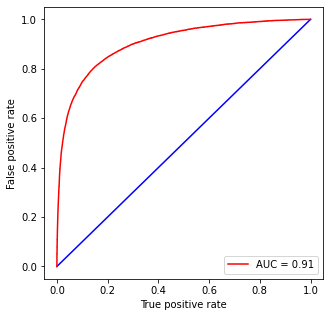

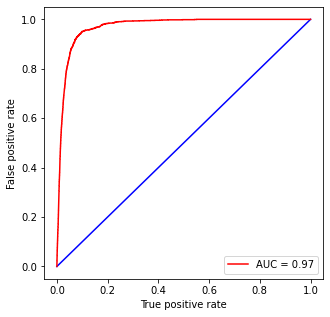

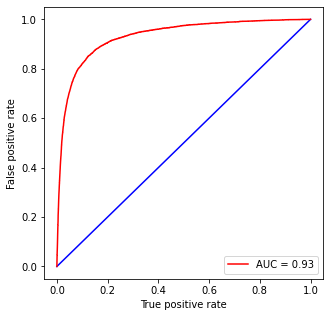

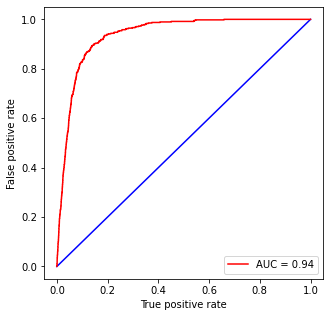

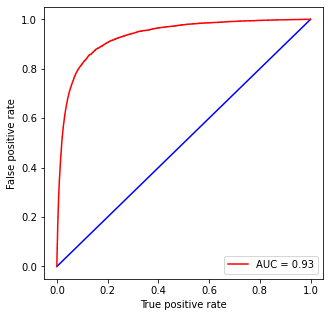

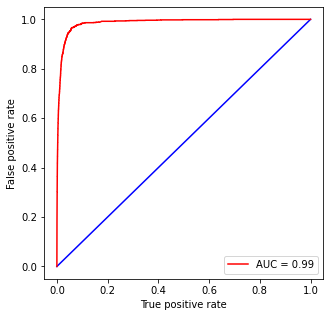

In [27]:
from sklearn.metrics import roc_curve,auc
for label in target_col:
    pred_pro = lg.predict_proba(x)[:,1]
    frp,trp,thres = roc_curve(train[label],pred_pro)
    auc_val =auc(frp,trp)
    plt.figure(figsize=(5,5))
    plt.plot([0,1],[0,1],color='b')
    plt.plot(frp,trp,color='r',label= 'AUC = %.2f'%auc_val)
    plt.legend(loc='lower right')
    plt.xlabel('True positive rate')
    plt.ylabel('False positive rate')

In [28]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()

for label in target_col:
    y=train[label]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y)
    dc.fit(x,y)
    pred=dc.predict(x_test)
    print('Accuracy: "{0}" : {1}'.format(label,accuracy_score(y_test,pred)))
    print('Classification report: "{0}" \n:{1}'.format(label,classification_report(y_test,pred)))
    print('Confusion matrix: "{0}"\n : {1}\n'.format(label,confusion_matrix(y_test,pred)))
    print('Log Loss: ',log_loss(y_test,pred))

Accuracy: "malignant" : 0.9986004344919787
Classification report: "malignant" 
:              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43284
           1       1.00      0.99      0.99      4588

    accuracy                           1.00     47872
   macro avg       1.00      0.99      1.00     47872
weighted avg       1.00      1.00      1.00     47872

Confusion matrix: "malignant"
 : [[43272    12]
 [   55  4533]]

Log Loss:  0.04833948056542917
Accuracy: "highly_malignant" : 0.9989764371657754
Classification report: "highly_malignant" 
:              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47393
           1       0.99      0.90      0.95       479

    accuracy                           1.00     47872
   macro avg       1.00      0.95      0.97     47872
weighted avg       1.00      1.00      1.00     47872

Confusion matrix: "highly_malignant"
 : [[47390     3]
 [   46   433]]

Log 

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
for label in target_col:
    y=train[label]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y)
    rf.fit(x,y)
    pred=rf.predict(x_test)
    print('Accuracy: "{0}" : {1}'.format(label,accuracy_score(y_test,pred)))
    print('Classification report: "{0}" \n:{1}'.format(label,classification_report(y_test,pred)))
    print('Confusion matrix: "{0}"\n : {1}\n'.format(label,confusion_matrix(y_test,pred)))
    print('Log Loss: ',log_loss(y_test,pred))

Accuracy: "malignant" : 0.9984959893048129
Classification report: "malignant" 
:              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43284
           1       1.00      0.99      0.99      4588

    accuracy                           1.00     47872
   macro avg       1.00      0.99      1.00     47872
weighted avg       1.00      1.00      1.00     47872

Confusion matrix: "malignant"
 : [[43270    14]
 [   58  4530]]

Log Loss:  0.05194692293611379
Accuracy: "highly_malignant" : 0.9988719919786097
Classification report: "highly_malignant" 
:              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47393
           1       0.99      0.90      0.94       479

    accuracy                           1.00     47872
   macro avg       0.99      0.95      0.97     47872
weighted avg       1.00      1.00      1.00     47872

Confusion matrix: "highly_malignant"
 : [[47388     5]
 [   49   430]]

Log 

In [30]:
from sklearn.svm import SVC
svc=SVC()
for label in target_col:
    y=train[label]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y)
    svc.fit(x,y)
    pred=svc.predict(x_test)
    print('Accuracy: "{0}" : {1}'.format(label,accuracy_score(y_test,pred)))
    print('Classification report: "{0}" \n:{1}'.format(label,classification_report(y_test,pred)))
    print('Confusion matrix: "{0}"\n : {1}\n'.format(label,confusion_matrix(y_test,pred)))
    print('Log Loss: ',log_loss(y_test,pred))

Accuracy: "malignant" : 0.9796540775401069
Classification report: "malignant" 
:              precision    recall  f1-score   support

           0       0.98      1.00      0.99     43284
           1       0.97      0.81      0.88      4588

    accuracy                           0.98     47872
   macro avg       0.98      0.90      0.94     47872
weighted avg       0.98      0.98      0.98     47872

Confusion matrix: "malignant"
 : [[43174   110]
 [  864  3724]]

Log Loss:  0.7027251037007095
Accuracy: "highly_malignant" : 0.9929603943850267
Classification report: "highly_malignant" 
:              precision    recall  f1-score   support

           0       0.99      1.00      1.00     47393
           1       0.94      0.32      0.47       479

    accuracy                           0.99     47872
   macro avg       0.97      0.66      0.74     47872
weighted avg       0.99      0.99      0.99     47872

Confusion matrix: "highly_malignant"
 : [[47383    10]
 [  327   152]]

Log L

In [41]:
for label in target_col:
    predt=dc.predict(test_x)
    test[label]=predt

In [48]:
test.to_csv("toxic_test_Pred")